### Употреба и визуелизација на Брза Фуриева Трансформација во делот - "Процесирање на Сигнали - приказ на комбиниран сигнал и неговите фреквенции"

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq

In [2]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


Најпрво, се креира домен со приказ на одреден број точки кои се однесуваат на временскиот период
прикажан во секунди

In [4]:
n = 1000 # број на точки
time = 100 # временски период (секунди)

Земајќи во предвид дека ваквата трансформација започнува со приказ на едноставен синусоиден сигнал, покрај синусоидниот употребив и косинусоиден сигнал и извршив пресметка и примена на големината на дадена фреквенција, позната како "angular frequency"

In [5]:
freq_angular = 2.0*np.pi/time # фреквентна големина (angular frequency)

Во овој дел креирам 4 различни индивидуални сигнали (две косинусоидни и две синусоидни), со промена на однапред дефинираната амплитуда во секој од нив и користење на различни бранови (waves) за приказ на соодветниот сигнал на графиконот

Напомена: Користам целобројни вредности изразени во децимален (float) формат, пр. 10 -> 10.0

In [6]:
x = np.linspace(0, time, n) # за приказ на точките во доменот
A = 1.0 # амплитуда
signal1 = A*np.cos(freq_angular*x*5.0) # 5.0 се однесува на 5 бранови на сигналот во соодветниот домен
signal2 = A*np.cos(freq_angular*x*2.0)
signal3 = 2*A*np.sin(freq_angular*x*10.0)
signal4 = A/2*np.sin(freq_angular*x*20.0)

Креирам композитен сигнал од наведените и го прикажувам:

Text(0, 0.5, 'Амплитуда')

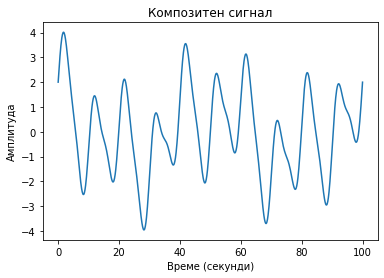

In [7]:
signal =  signal1 + signal2 + signal3 + signal4
plt.plot(x, signal)
plt.title("Композитен сигнал")
plt.xlabel("Време (секунди)")
plt.ylabel("Амплитуда")

Креирање на фреквенции и примена на БФТ:
Со цел да се примени Брза Фуриева Трансформација на сигналот, неопходно е да се креираат фреквенциите и да се повикаат функциите fft(), fftfreq() од пакетот numpy.fft

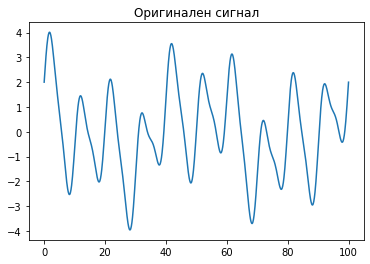

In [8]:
freqs = fftfreq(n)
mask = freqs > 0 # со цел да се отстранат негативните фреквенции
fft_values = fft(signal)
fft_theory = 2.0*np.abs(fft_values/n) # Теоретска примена на БФТ
plt.figure(1)
plt.title("Оригинален сигнал")
plt.plot(x, signal)

Во продолжение ќе биде проследена навигација, која ќе ја додадам, со која ќе овозможам зголемување на графиконот со цел преглед на вредностите на фреквенциите

C:\Users\atana\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


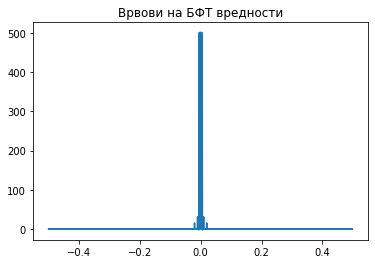

In [9]:
plt.figure(2)
plt.plot(freqs, fft_values)
plt.title("Врвови на БФТ вредности")
plt.show()

На сликата, може да забележеме 8 врвови, при што токму 4 од нив припаѓаат во негативниот дел на x - оската. Со цел отстранување на ваквите негативни фреквенции, истиот графикот е непотполен и е неопходно понатамошно процесирање на кодот.
Следејќи го правилото дека секој сигнал има само еден врв, не смееме да дозволиме дуплирање на врвовите всушност ги претставуваат фреквенциите на сигналот.
За таа цел, во кодот ја искористив променливата "mask" која како вредност ги прима само позитивните фреквенции, со што ги отстрани негативните фреквенции

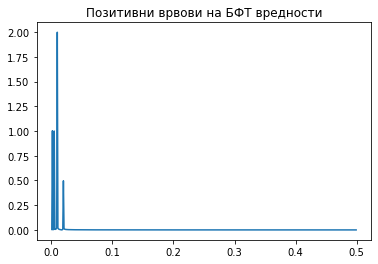

In [10]:
plt.rcParams['figure.figsize']
plt.figure(2)
plt.plot(freqs[mask],fft_theory[mask])
plt.title("Позитивни врвови на БФТ вредности")
plt.show()

Исходот е приказ на позитивните врвови на сигналите, како појасно претставување и разграничување на фреквенциите за дадените сигнали

Во овој дел е извршена примена на едноставна БФТ, со цел да бидат запазени основите при нејзиното имплементирање.

###### Извршена е целокупна модификација на кодот за репрезентација на сигнали
Дел од кодот кој е преземен за визуелно прикажување е од следните веб страни:
1. https://nbviewer.jupyter.org/github/balzer82/FFT-Python/blob/master/FFT-Tutorial.ipynb
2. https://realpython.com/python-scipy-fft/
3. https://pythontic.com/visualization/signals/fouriertransform_fft